In [1]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets

In [3]:
EMNIST_train = torchvision.datasets.EMNIST('./', download=True, train=True, split='letters')
EMNIST_test = torchvision.datasets.EMNIST('./', download=True, train=False, split='letters')

100%|██████████| 561753746/561753746 [00:32<00:00, 17058277.76it/s]


Extracting ./EMNIST/raw/gzip.zip to ./EMNIST/raw


In [4]:
# формируем датасеты для обучения, тестирования, целевые переменные
X_train = EMNIST_train.train_data
y_train = EMNIST_train.train_labels
X_test = EMNIST_test.test_data
y_test = EMNIST_test.test_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


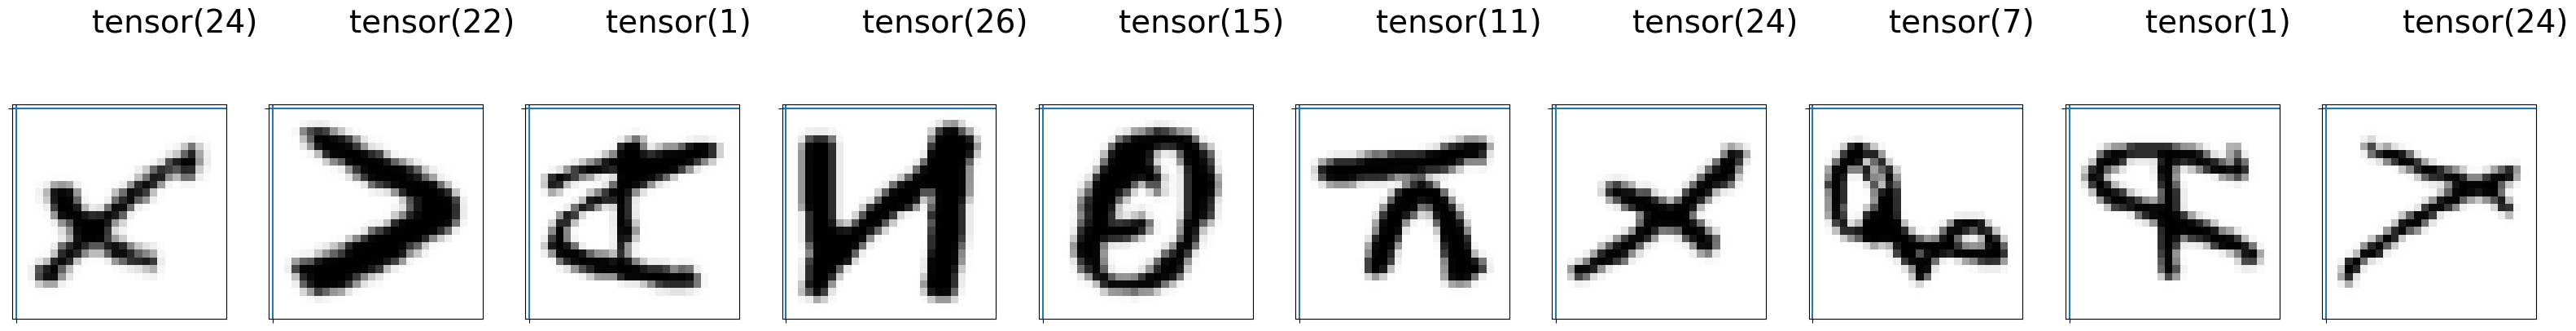

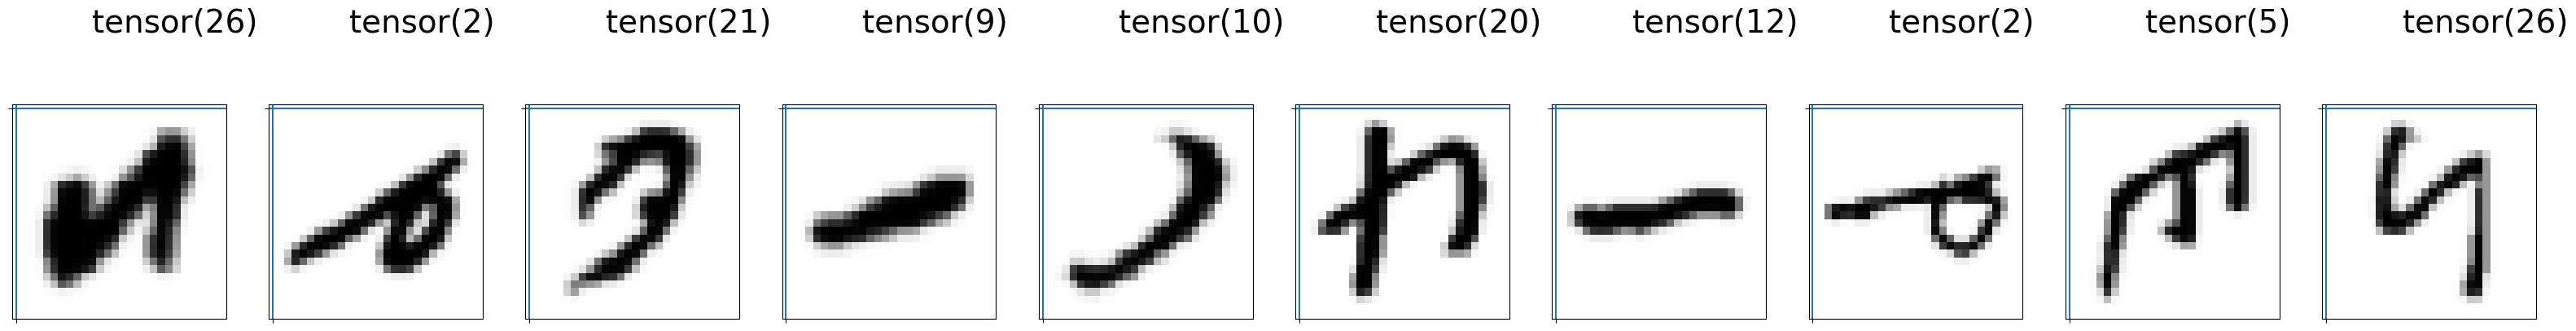

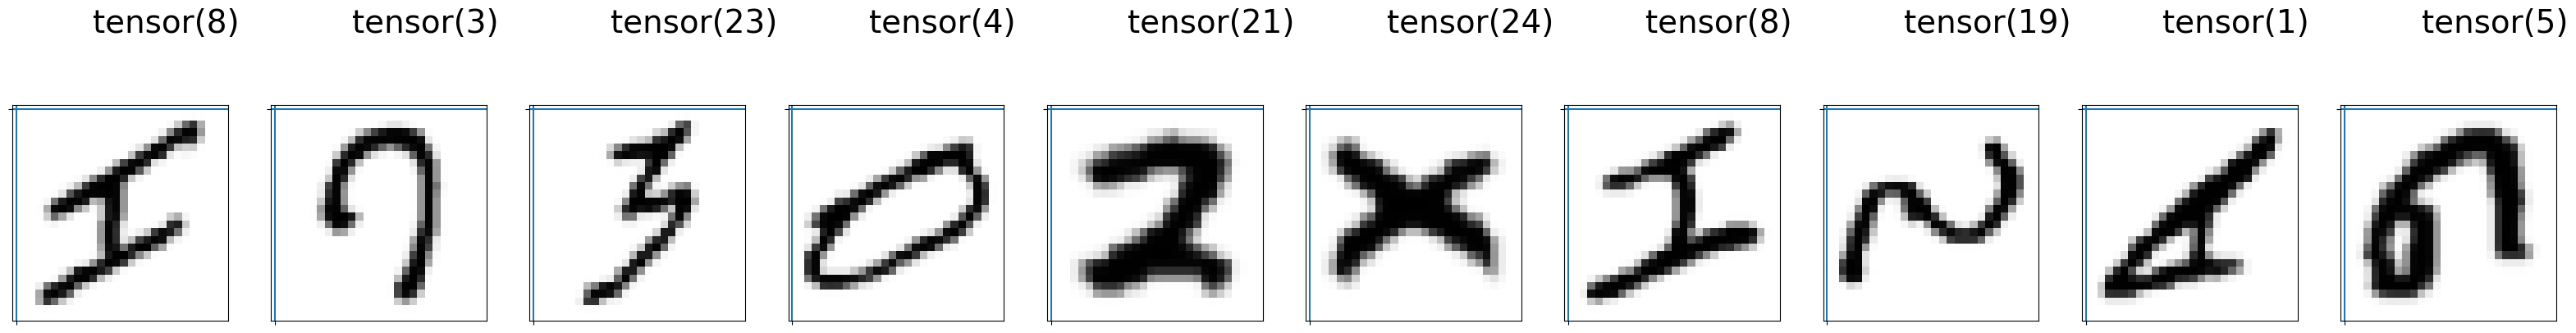

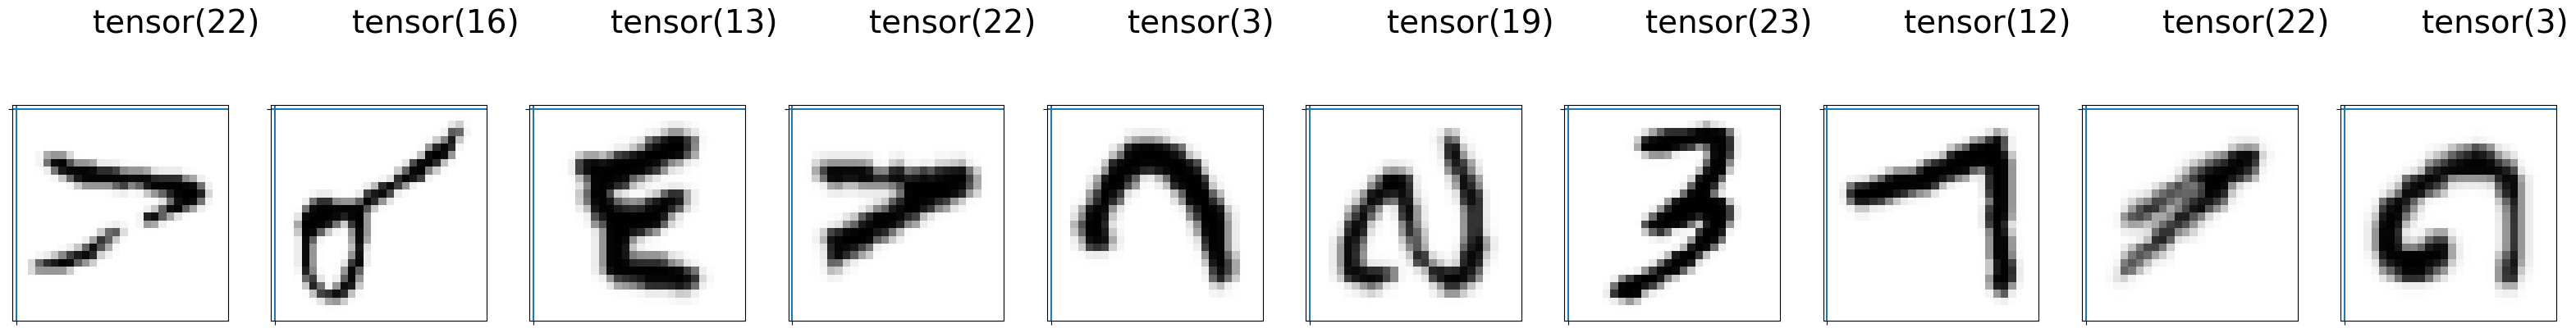

In [5]:
# посмотрим, что пришло

import numpy as np
import matplotlib.pyplot as plt

# посмотрим какие-то произвольные изображения из датасета

sample_size = 10  # сколько картинок будем смотреть
for _ in range(4):
  plt.figure(figsize=(40, 20))
  count = 0
  for i in np.random.permutation(X_train.shape[0])[:sample_size]:
      count = count + 1
      plt.subplot(1, sample_size, count)
      plt.axhline('')
      plt.axvline('')
      plt.text(x=10, y=-10, s=y_train[i], fontsize=28)
      plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.Greys)
  plt.show()

In [6]:
# сколько изображений в трейне и тесте
len(y_train), len(y_test)

(124800, 20800)

image:
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,  18,  37,   8,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0, 106, 242, 207,  47,   0,   0,   0],
        [  0,   0,   0,   1,  32,   7,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   3,  95, 251, 218,   9,   0,   0],
        [  0,   0,   5,  95, 241,  81,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   8, 208, 251,  82,   0,   0],
        [  0,   0,  82, 252, 252,  82,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0, 127, 254, 127,   0,   0],
        [  0,   2, 172, 254, 245,  32, 

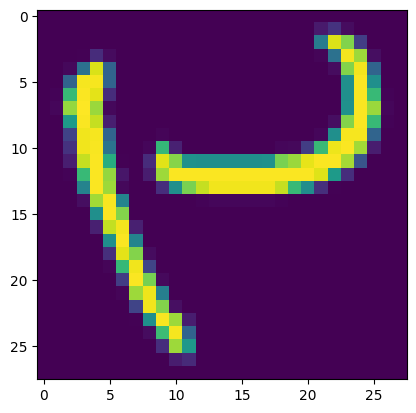

tensor(10)


In [7]:
# нарисуем, c чем мы имеем дело
import matplotlib.pyplot as plt

im_number = 10

# вот как хранятся изображения в компьютере
print(f"image:\n{X_train[im_number, :, :]}")

# а так их видим мы
plt.imshow(X_train[im_number, :, :])

plt.show()
print(y_train[im_number])

In [8]:
# посмотртим тип "картинок"
type(X_train[10, :, :])

torch.Tensor

In [9]:
X_train.shape

torch.Size([124800, 28, 28])

In [10]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [11]:
X_train.shape

torch.Size([124800, 1, 28, 28])

In [12]:
# Определяем класс, которые и будет представлять нашу нейронку

class LeNet5(torch.nn.Module):
    # конструктор. Определям вообще какие слои у нас будут
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        # используем ReLU в качестве функции активации
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.ReLU()

        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.ReLU()

        self.fc3   = torch.nn.Linear(84, 37)

    # наша самая главная функция. Определяем, что и в каком порядке будет вызываться
    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

# переменная - наша нейронка
lenet5 = LeNet5()

In [13]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

lenet5 = lenet5.to(device)

In [14]:
# в качестве функции потерь будем использовать CrossEntropyLoss()
loss = torch.nn.CrossEntropyLoss()

# в качестве оптимайзера, который будет вычислять градиенты и минимизировать функцию потерь, будем использовать Adam (Адаптивная оценка момента)
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [33]:
# будем оптимизировать по 200 параметров одним комплектом (бачем)
batch_size = 200

# чтобы посмотреть, как и что у нас тут менялось при оптимизации на тестовой выборке
test_accuracy_history = []
test_loss_history = []


train_loss_history = []

# не забываем отправить все выборки на устройство, на котором обучаем
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        # обязательно обнуляем градиенты
        optimizer.zero_grad()

        # берем пачку параметров
        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        # делаем предсказание
        preds = lenet5.forward(X_batch)

        # считаем лосс значение
        loss_value = loss(preds, y_batch)

        # берем градиенты
        loss_value.backward()

        # и пусть оптимайзер все оптимизирует
        optimizer.step()

    # смотрим, что он тут нам напредсказывал, не забывая вовремя отправлять на cpu
    train_loss_history.append(loss_value.data.cpu())

    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())


    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(f"epoch{epoch} - accuracy test {accuracy} ")

epoch0 - accuracy test 0.9321634769439697 
epoch1 - accuracy test 0.9312499761581421 
epoch2 - accuracy test 0.9313942193984985 
epoch3 - accuracy test 0.9323557615280151 
epoch4 - accuracy test 0.931538462638855 
epoch5 - accuracy test 0.9331250190734863 
epoch6 - accuracy test 0.9322115182876587 
epoch7 - accuracy test 0.9312499761581421 
epoch8 - accuracy test 0.9297115206718445 
epoch9 - accuracy test 0.9307211637496948 
epoch10 - accuracy test 0.9305769205093384 
epoch11 - accuracy test 0.9317788481712341 
epoch12 - accuracy test 0.9309134483337402 
epoch13 - accuracy test 0.9306730628013611 
epoch14 - accuracy test 0.9302403926849365 
epoch15 - accuracy test 0.9281730651855469 
epoch16 - accuracy test 0.9293749928474426 
epoch17 - accuracy test 0.9282692074775696 
epoch18 - accuracy test 0.9273557662963867 
epoch19 - accuracy test 0.9295673370361328 
epoch20 - accuracy test 0.9275480508804321 
epoch21 - accuracy test 0.9302884340286255 
epoch22 - accuracy test 0.9294711351394653 

<ipython-input-34-b17f85a2737f>:2: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


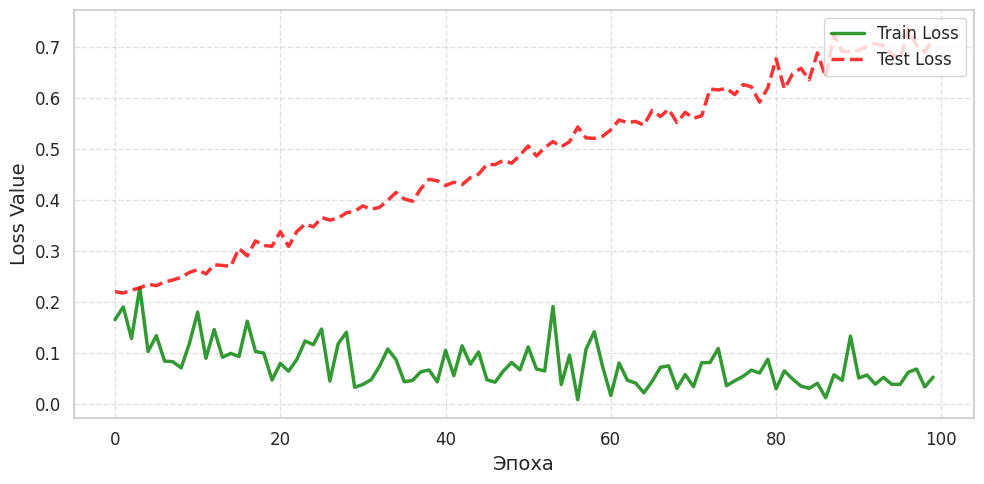

In [34]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
import seaborn as sns

sns.set(style="whitegrid")

fig = plt.figure(figsize=(10, 5))

# график без сглаживания
ax = fig.add_subplot(111)
ax.set_xlabel('Эпоха', fontsize=14)
ax.set_ylabel('Loss Value', fontsize=14)

ax.plot(train_loss_history, color='green', linestyle='-', linewidth=2.5, label='Train Loss', alpha=0.8)
ax.plot(test_loss_history, color='red', linestyle='--', linewidth=2.5, label='Test Loss', alpha=0.8)

ax.grid(True, linestyle='--', alpha=0.6)

ax.legend(fontsize=12, loc='upper right')

ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()


<ipython-input-35-1f3b1936f6ff>:3: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


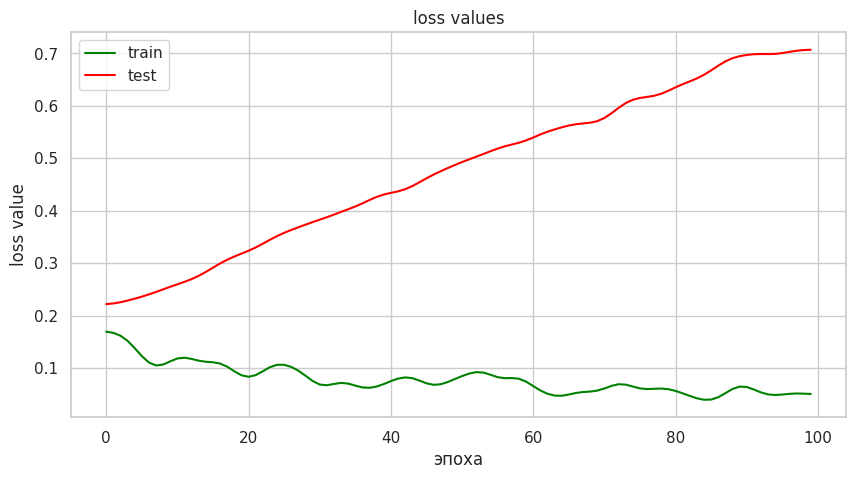

In [35]:
# строим графики - функции потерь

from scipy.ndimage.filters import gaussian_filter1d
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.set(title = 'loss values',
       xlabel = 'эпоха',
       ylabel = 'loss value')
train_loss_smoothed = gaussian_filter1d(train_loss_history, sigma=2)
ax.plot(train_loss_smoothed, color='green',  label='train')

test_loss_smoothed = gaussian_filter1d(test_loss_history, sigma=2)
ax.plot(test_loss_smoothed, color='red',  label='test')
ax.legend()
plt.show()

<ipython-input-36-7ea75e20b699>:3: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


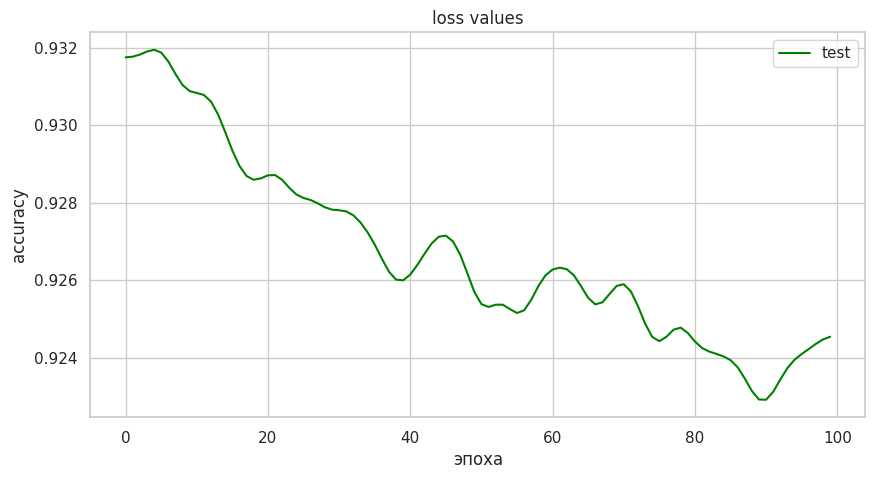

In [36]:
# График изменения accuracy на тестовых данных

from scipy.ndimage.filters import gaussian_filter1d
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.set(title = 'loss values',
       xlabel = 'эпоха',
       ylabel = 'accuracy')
test_accuracy_smoothed = gaussian_filter1d(test_accuracy_history, sigma=2)
ax.plot(test_accuracy_smoothed, color='green',  label='test')

ax.legend()
plt.show()


In [37]:
timg = X_train[13]
print(y_train[13])
torch.save(timg,'tensor.pt')


tensor(21)


In [38]:
timg.size()

torch.Size([1, 28, 28])

In [39]:
X_test.size()

torch.Size([20800, 1, 28, 28])

In [40]:
import pickle

with open("model.pickle", "wb") as pickle_file:
    pickle.dump(lenet5, pickle_file)

In [41]:
# считываем модель, сохраненную в dill
import torch
import torch.nn as nn
#from LeNET_5 import LeNet
import pandas as pd
import numpy as np



ifile = open("model.pickle", "rb")
modelp = pickle.load(ifile)
ifile.close()

# загружаем наше изображение
test_data = torch.load('tensor.pt')

# смотрим, что пришло из dill файла
print(modelp)


<ipython-input-41-3893f0c55aa8>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_data = torch.load('tensor.pt')


LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (act1): ReLU()
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (act2): ReLU()
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (act3): ReLU()
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (act4): ReLU()
  (fc3): Linear(in_features=84, out_features=37, bias=True)
)


In [42]:
type(modelp)

__main__.LeNet5

In [43]:
t_data = torch.tensor([test_data.numpy()])

In [44]:
t_data.shape

torch.Size([1, 1, 28, 28])

In [45]:
# проверяем, на чем можем считать
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# отправляем туда модель
modelp.to(dev)
model_data = modelp.to(dev)

# тензор-изображение тоже
t_data = t_data.to(dev)

In [46]:
# делаем предсказание
preds = modelp.forward(t_data)

In [47]:
print(preds)

tensor([[-66.0500, -20.0217, -28.2838, -42.1921, -17.1760, -30.4856, -22.2902,
         -26.0314, -19.7979, -48.9039, -12.2470,   3.1859, -20.1287, -18.9324,
         -17.2750, -78.0596,  -8.8356, -27.4657, -36.2142, -68.6009, -29.4510,
          26.5330,  -6.2216,  -1.7782, -15.3258,  11.2891, -23.9283, -66.5195,
         -69.8969, -77.3343, -69.6392, -66.1463, -74.1112, -71.2699, -73.1095,
         -71.6030, -67.5385]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [48]:
# выбираем максимальную вероятность, как результат предсказания.
prediction = np.argmax(preds.to('cpu').detach().numpy(),axis=1)

In [49]:
print(prediction)

[21]


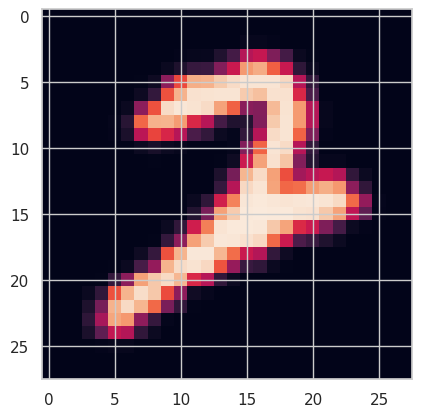

In [50]:
plt.imshow(test_data[0, :, :])
plt.show()